In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
temperature=ctrl.Antecedent(np.arange(0,41,1),'temperature')
humidity=ctrl.Antecedent(np.arange(0,101,1),'humidity')
num=ctrl.Antecedent(np.arange(0,11,1),'num')
speed=ctrl.Consequent(np.arange(0,101,1),'speed')
level=ctrl.Consequent(np.arange(0,11,1),'level')

In [3]:
temperature['cold']=fuzz.trimf(temperature.universe,[0,0,20])
temperature['cool']=fuzz.trimf(temperature.universe,[19,25,30])
temperature['comfortable']=fuzz.trimf(temperature.universe,[25,29,33])
temperature['warm']=fuzz.trimf(temperature.universe,[30,35,37])
temperature['hot']=fuzz.trimf(temperature.universe,[36,38,40])

In [4]:
humidity['low']=fuzz.trimf(humidity.universe,[0,0,50])
humidity['medium']=fuzz.trimf(humidity.universe,[30,50,70])
humidity['high']=fuzz.trimf(humidity.universe,[50,100,100])

In [5]:
num['few']=fuzz.trimf(num.universe,[0,2,4])
num['moderate']=fuzz.trimf(num.universe,[3,5,7])
num['many']=fuzz.trimf(num.universe,[6,8,10])

In [6]:
speed['low']=fuzz.trimf(speed.universe,[0,0,50])
speed['medium']=fuzz.trimf(speed.universe,[30,50,70])
speed['high']=fuzz.trimf(speed.universe,[50,70,100])

In [7]:
level['low']=fuzz.trimf(level.universe,[0,2,5])
level['medium']=fuzz.trimf(level.universe,[3,5,7])
level['high']=fuzz.trimf(level.universe,[6,8,10])

In [8]:
rule1=ctrl.Rule(temperature['cold'],speed['low'])
rule2=ctrl.Rule(temperature['cool'],speed['low'])
rule3=ctrl.Rule(temperature['comfortable'],speed['medium'])
rule4=ctrl.Rule(temperature['warm'],speed['high'])
rule5=ctrl.Rule(temperature['hot'],speed['high'])

rule6=ctrl.Rule(temperature['cold'],level['low'])
rule7=ctrl.Rule(temperature['cool'],level['low'])
rule8=ctrl.Rule(temperature['comfortable'],level['medium'])
rule9=ctrl.Rule(temperature['warm'],level['high'])
rule10=ctrl.Rule(temperature['hot'],level['high'])

rule11=ctrl.Rule(humidity['medium'],level['medium'])
rule12=ctrl.Rule(humidity['high'],level['high'])

rule13=ctrl.Rule(num['few'],speed['low'])
rule14=ctrl.Rule(num['moderate'],speed['medium'])
rule15=ctrl.Rule(num['many'],speed['high'])

rule16=ctrl.Rule(temperature['hot']& humidity['high']& num['many'],(level['high'], speed['high']))
rule17=ctrl.Rule(temperature['comfortable']& humidity['medium']& num['moderate'],(level['medium'], speed['medium']))
rule18=ctrl.Rule(temperature['cool']& humidity['low']& num['few'],(level['low'], speed['low']))


speed 61.548463356974004
level 4.31400966183575


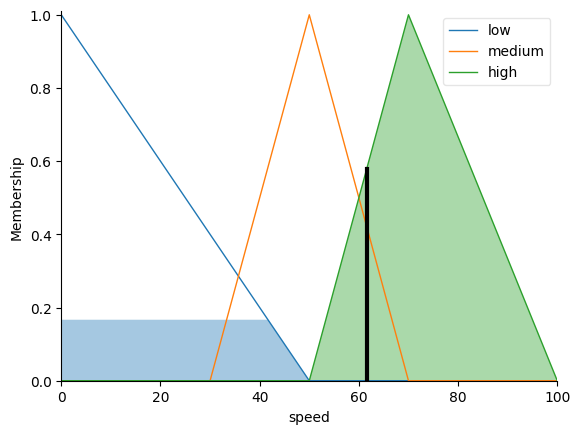

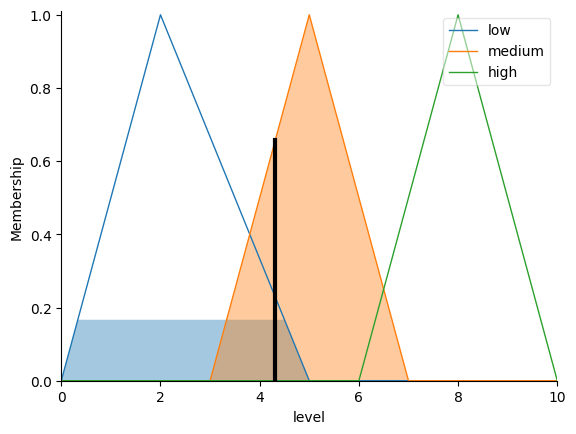

In [9]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18])
system=ctrl.ControlSystemSimulation(control_system)
system.input['temperature']=20
system.input['humidity']=50
system.input['num']=8
system.compute()
print('speed',system.output['speed'])
print('level',system.output['level'])
speed.view(sim=system)
level.view(sim=system)